In [1]:
# run the header that sets up the environment

already_run = globals().get("already_run", False)
if not (already_run):
    already_run = True
    %run header.ipynb

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.30.0
c:\Users\andre\OneDrive\Bildung\3_HHU\quant_Bio\6th\BA\QTB_modeling\analyses
c:\Users\andre\OneDrive\Bildung\3_HHU\quant_Bio\6th\BA\QTB_modeling


# Model

In [28]:
#stoichio_subset = m.get_stoichiometric_df().loc[:,["v2_to_P700FA-", "v3_to_P700FA", "v4_to_P700+FA", "v5_to_P700FA"]]
#stoichio_subset.loc[(stoichio_subset != 0).any(axis=1)]


In [3]:
#m.get_algebraic_module("P700+FA_alm")
print(m.get_algebraic_module("P700+FA_alm"))
m.get_algebraic_module("P700+FA_alm")

moiety_3(P700FA-, P700FA, P700+FA-, PSItot) -> ['P700+FA']


{'name': 'P700+FA_alm', 'function': <function moiety_3 at 0x000001BD4408CF70>, 'compounds': ['P700FA-', 'P700FA', 'P700+FA-'], 'derived_compounds': ['P700+FA'], 'modifiers': [], 'parameters': ['PSItot'], 'dynamic_variables': ['P700FA-', 'P700FA', 'P700+FA-'], 'args': ['P700FA-', 'P700FA', 'P700+FA-', 'PSItot']}

In [2]:
#m.get_compound_stoichiometry("PC")
m.get_compound_stoichiometry("PC")

{'vB6f': -2, 'v2_to_P700FA-': 1, 'v5_to_P700FA': 1}

In [6]:
#m.get_parameter("k1")
m.get_parameter("kMehler")

1.0

In [4]:
#m.get_rate_args("v2_to_P700FA-")
m.get_rate_args("v2_to_P700FA-")

['P700+FA-', 'PCred', 'PC', 'P700FA-', 'kPCox', 'Keq_PCP700']

In [10]:
#m.get_rate_function("v2_to_P700FA-")(1,2,3,4,5,6)
m.get_rate_function("v3_Mehler")(1,2,3)

6

In [5]:
m.check_unused_compounds()

set()

In [6]:
m.check_missing_parameters()

set()

In [7]:
set(m.check_unused_parameters())- {'APX0','ATPcyt','CN','Ca','Ctot','E0_cytf','Keq_cyc','Km161','Km162','Kmnadph','NADPHcyt','bH','dT','k1','k1APX','k1rev','k2APX',
                                    'k3APX','k4','k4APX','k5','k5APX','k6','k7','k8','kATPcons','kActATPase','kDeactATPase','kNADPHcons','kNh','kNr','kProtonation','kdeg','krep','nH','pHmedium','prob_attach'}

set()

# Simulator

In [2]:
y0 = {
    "PQ": 11.027139850905353,"PC": 1.8895071932002812,"Fd": 3.8690237263896705,"ATP": 1.620195002854852,"NADPH": 0.4882103700673736,"H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,"Psbs": 0.9607146039898598,"Vx": 0.950783616933656,"PGA": 0.9913970817549008,"BPGA": 0.0005355311557548053,"GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,"FBP": 0.006126990841013743,"F6P": 0.31166103888161867,"G6P": 0.7168203893211117,"G1P": 0.041575582577936025,"SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,"E4P": 0.00732079113061801,"X5P": 0.022396849486562384,"R5P": 0.03751472214765548,"RUBP": 0.13153657267999222,"RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,"ASC": 9.999994138785292,"H2O2": 3.4273920330125316e-06,"DHA": 8.513863740903352e-09,"GSH": 9.999999991725186,"GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,"E_inactive": 4.7368421052631575,
    "P700FA": 1.4731,            #eq at pfd 800       #"PSItot": 2.5, (in parameter vector of Matuszynska)
    "P700+FA-": 0.0131,
    "P700FA-": 0.0177,
}

In [23]:
s = Simulator(m)
s.initialise(y0)
t_end = 200
steps_per_second = 1

steps = steps_per_second * t_end

pfd = 500
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = t_end, steps = steps)

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

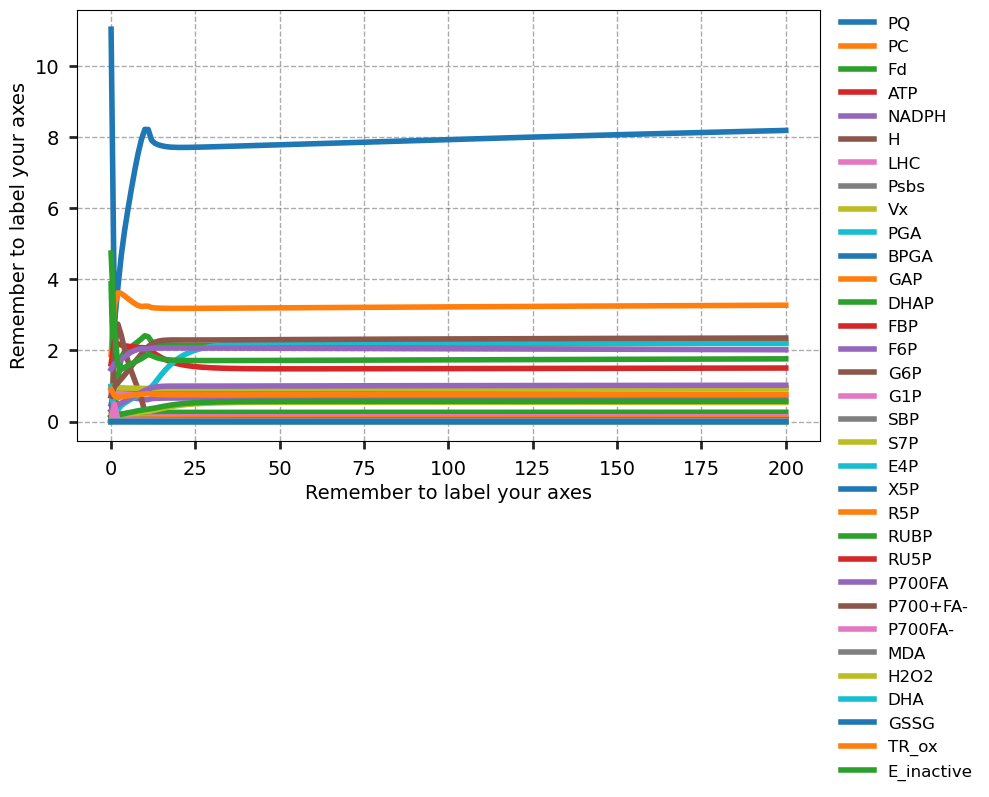

In [24]:
s.plot()

In [8]:
results = s.get_full_results_df()

# check if results are identical

In [ ]:
results

In [ ]:
results2

In [11]:
joblib.dump(results, "result_weird_function.pkl")

['result_weird_function.pkl']

In [9]:
results2 = joblib.load("result_weird_function.pkl")

In [10]:
(results2 == results).all().all()

np.True_